In [2]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# image = cv2.imread('image.jpg',0) # Only for grayscale image
# noise_img = sp_noise(image,0.05)
# cv2.imwrite('sp_noise.jpg', noise_img)

In [7]:
image_path = './SinGAN-master/Input/Images/Golden_Bridge_by_night.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

noise_img = sp_noise(image,0.001)

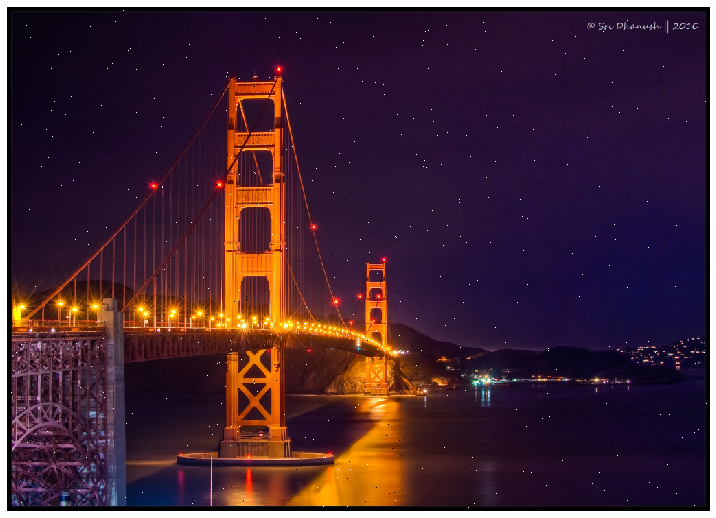

In [8]:
fig = plt.figure(figsize=(15,7),
#                  frameon=False
                 )

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(noise_img)
fig.savefig("Salt_and_Pepper_Golden_Bridge_by_night.png")


***

In [33]:
original = cv2.imread('./SinGAN-master/Input/Images/Golden_Bridge_by_night.jpg')
noised = cv2.imread("./SinGAN-master/Input/Images/Salt_and_Pepper_Golden_Bridge_by_night.png")
noised_reshaped= cv2.resize(noised, original.shape[:-1][::-1])
cv2.PSNR(original, noised_reshaped)

12.15548516430513

In [34]:
SR_denoised = cv2.imread('./Superresolution_lownoise.png')
SR_denoised_reshaped= cv2.resize(SR_denoised, original.shape[:-1][::-1])
cv2.PSNR(original, SR_denoised_reshaped)

22.28533504724922

In [36]:
method_denoised = cv2.imread('D:\MVA\CompVision\Project\SinGAN-master\Input\Images/0.png')
method_denoised_reshaped= cv2.resize(method_denoised, original.shape[:-1][::-1])
cv2.PSNR(original, method_denoised_reshaped)

12.518995725088189

In [45]:
SR_Trained_on_noised = cv2.imread("./Golden_Bridge_by_night_salt_pepper_HR.png")
SR_Trained_on_noised_reshaped= cv2.resize(SR_Trained_on_noised, original.shape[:-1][::-1])
cv2.PSNR(original, SR_Trained_on_noised_reshaped)

13.472542834582196

***

In [38]:
from skimage import measure

In [42]:
measure.compare_ssim(original, noised_reshaped, multichannel=True)

0.14753969078341986

In [43]:
measure.compare_ssim(original, SR_denoised_reshaped, multichannel=True)

0.7940406289559623

In [44]:
measure.compare_ssim(original, method_denoised_reshaped, multichannel=True)

0.12658778868114723

In [46]:
measure.compare_ssim(original, SR_Trained_on_noised_reshaped, multichannel=True)

0.16938817717387364